**Lecture 6 – Decision Trees**

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/06_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

In [6]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Training and Visualizing a Decision Tree

Decisions tree is a popular and easy-to-understand classic ML model.

So what is it? Let train one see the results.

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

To visualize the results, we need first save the result as a file and reload it. 
(It's a bit cumbersome, I know)

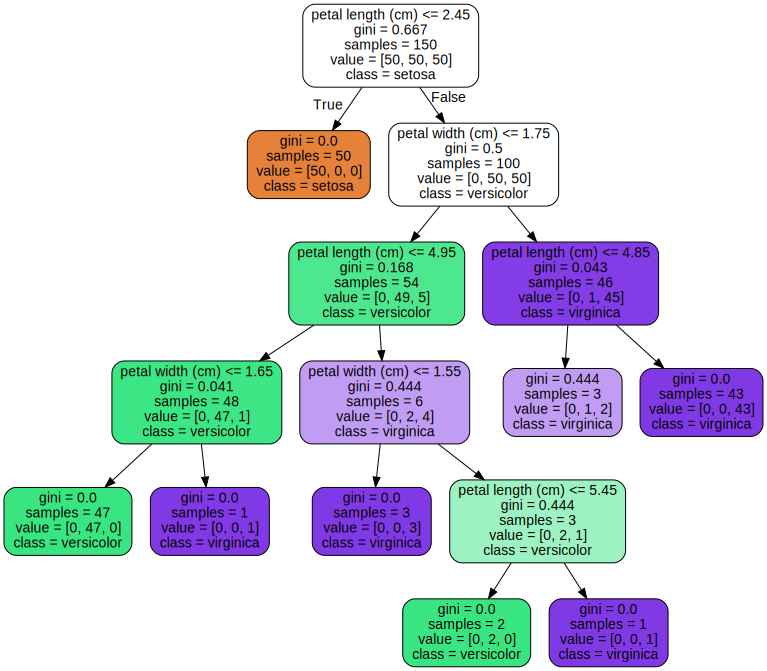

In [8]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## Making Predictions

The figure show the learned Decision Tree. 

You'll see why it's called Decision Tree.
Here are the steps for predicting a new flower:
* Start at the root node (depth 0, at the
top): if the flower’s petal length is smaller than 2.45 cm then go to the left child (depth 1).
   * It's a leaf node, so no more questions. The prediction is "class=setosa".
* At depth 0, if the flower's length is larger than 2.45 cm, go to the right child (depth 1). It's not a leaf.
   * Now look at the petal width, if it's less than 1.75 then go to the left child (depth 2). Since it's a leaf node, we make the prediction, which is "class=versicolor".
   * If it's more than 1.75, go to the right child (depth s), and we make the prediction "class=virginica"
   

Q. Can you imagine what the decision boundary looks like?

x-axis: petal length,  y-axis: petal width

Below is the code to visualize the decision boundary.

Saving figure decision_tree_decision_boundaries_plot


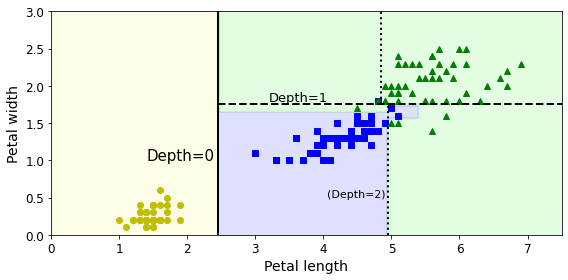

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

The points above are training examples, by the way. 

Go back and look at the tree again
 * gini impurity index: $1-\sum_i p_i^2$ 
 * no of samples
 * value = [class 1, class 2, class 3]
 * predicted class

If value = [0, 49, 5], then $p_1=0/54,\;p_2=49/54,\;p_3=5/54$, 

so gini index is $1 - (0/54)^2 - (49/54)^2 - (5/54)^2 = 0.168$.

It is smallest 0 if the class is entirely of one class (i.e., pure), and is largest, closer to 1, if all classes are equally present (i.e., impure).

# Estimating Class Probabilities

Q. Some classifiers can output confidence probability. Whar are they?

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

## Training algorithm

Now we understand how prediction is done at test time, let's look at how training is done.

It's very different from training SVM, logistic regression, etc. No continuous optimization like SGD is applicable.

We grow the tree one node at a time.
* Start from the root (depth 0)
* Stop if the stopping criterion is met.
* Decide which feature (petal length, petal width, etc.) and what threshold we should choose to split the $m$ samples.
 * Cost to minimize at each node is : $\frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$  (when is $G$ small or large?)
 * Find the optimal feature and the threshold. We can linearly go over all feature or use some random selection.
* Repeat the same with the newly added two children.

This is called the CART (classification and regression tree) algorithm, and there are many variants of decision trees.

Q. When do we stop? 

Q. Do we need to add exactly two children at a time?

Q. According to this training method, what happens to the training error in the end?

## Regularization Hyperparameters

We need to prevent overfitting by regularization.


Regularization in decision tree is quite different from SVC or logistic regression.
Q. What did we do?


Hyperparmaters you can use:
* max_depth: obvious
* min_samples_leaf: the minimum number of samples a leaf node must have
* max_leaf_nodes: the maximum number of leaf nodes

... and many others ...
* min_samples_split: the minimum number of samples a node must have before it can be split
*  min_weight_fraction_leaf: same as min_samples_leaf but expressed as a fraction of the total number of weighted instances
* max_features: the maximum number of features that are evaluated for splitting at each node

Don't need them all. Just one is okay.

Increasing min_xxx  or reducing max_xxx will regularize the model.



Let's retrain with differen min_samples_leaf.

Saving figure min_samples_leaf_plot


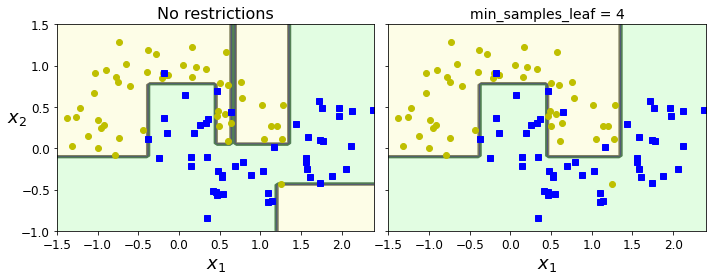

In [11]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

# Regression

Let's prepare a simple linear dataset:

In [12]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

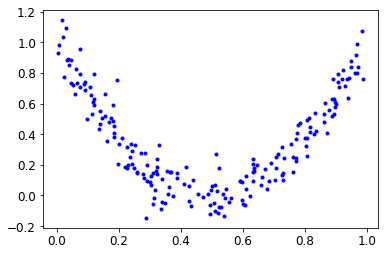

In [13]:
plt.plot(X, y, "b.")
plt.show()

The usage of decesion tree for regression problem is similar.

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Picture of decision tree for regression.

In [16]:
export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

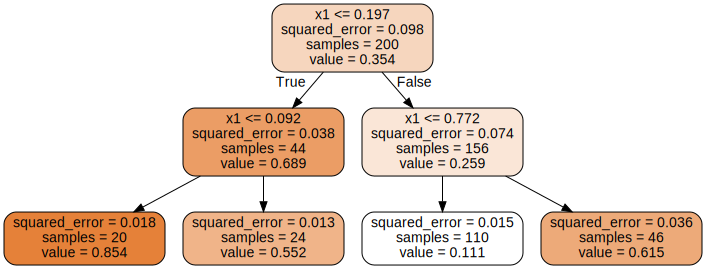

In [ ]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

This tree looks very similar to the classification tree you built earlier. The main difference
is that instead of predicting a class in each node, it predicts a value. For example,
suppose you want to make a prediction for a new instance with x1 = 0.6. You traverse
the tree starting at the root, and you eventually reach the leaf node that predicts
value=0.111. This prediction is the average target value of the 110 training instances
associated with this leaf node, and it results in a mean squared error equal to 0.015
over these 110 instances.

Predictions of two Decision Tree regression models.

Saving figure tree_regression_plot


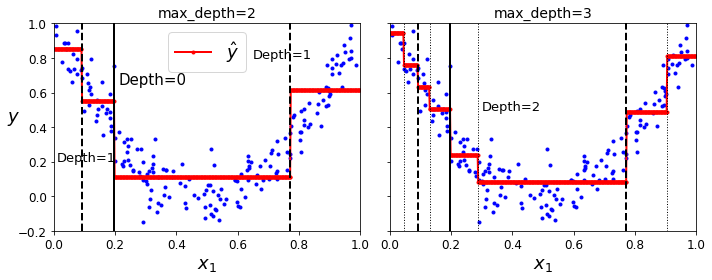

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

## Training

The training algorithm for regression is very similar to that of classification.

Only the cost function (to be greedily minimized 
at each node) is different:

* Cost : $\frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right}$  

where 
 * $\hat{y}_{node} = \frac{1}{m_{node}}\sum_{j \in node} y^{(j)}$, and
 * $MSE_{node} = \frac{1}{m_{node}}\sum_{j \in node} (\hat{y}_{node} - y^{j})^2$

Compare: 
* Cost : $\frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$  for classification.


Q. What would happen if we let the regression tree grow without restriction?

Regularizing a Decision Tree regressor:

Saving figure tree_regression_regularization_plot


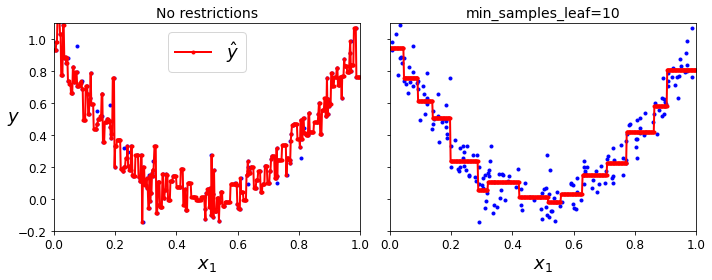

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

## Pros and cons of decision tree.
Pros: 
* simple to understand and interpret
* easy to use
* versatile
* powerful

Cons: 
* works best for tabular data (as oppose to high-dimensional numerical data like images) 
* (related to above) decision bounaries are generated orthogonally. 
* Q. So what happens to rotated data? 
* sometimes unstable


## Instability

Small changes in the dataset (such as a rotation) may produce a very different Decision Tree.

Also, training the same model on the same data may produce a very different model every time 
(CART algorithm used by Scikit-Learn is stochastic)

To see this, we will set `random_state` to a different value than earlier:

In [ ]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


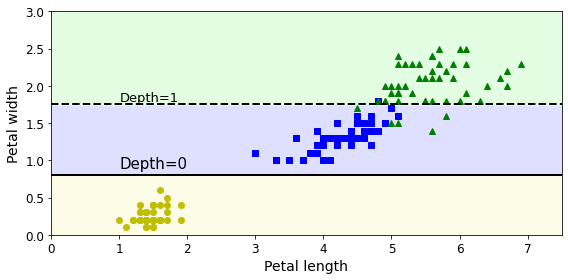

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()



Rotating the dataset also leads to completely different decision boundaries:

Saving figure sensitivity_to_rotation_plot


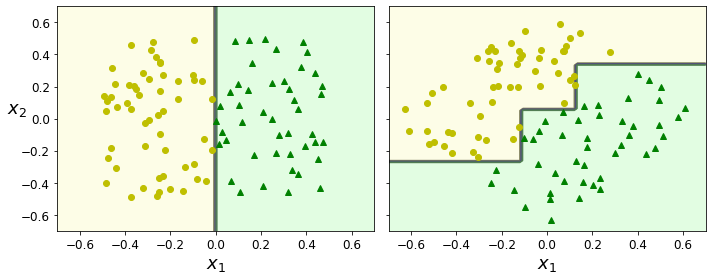

In [ ]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()